# Урок 5. Функції. рекурсії
## Частина 1. Функції
### план
#### Частина 1. Функції

- Оголошення функції. Вбудовані функції. Виклик функції. Передача аргументів.
- Глобальні і локальні змінні
- Функції і незмінні типи (int, string, tuple)
- Функції та змінні типи (list, dict, set)
- іменовані аргументи
- Обробка змінного числа аргументів
- Повернення даних з функції за допомогою Return
- Лямбда-функції
- Генератори
#### Частина 2. Рекурсивні функції
1. Оголошення функції
def <названіе_функціі> (<параметр1>, <параметр2>, ..., <параметрN>):

<Оператор1>
<Оператор2>
....
<ОператорN>
return [Вираз]

In [1]:
# Простейшая функция. Ничего не принимает в качестве аргументов и ничего не делает
def do_nothing():
    pass

# вызов функции
do_nothing()

# Передача параметра
def say_hi_to(name): 
    print("Hi dear", name)
    return 0

name = "Andrew"
var1 = "String"
say_hi_to(name)
var1 = say_hi_to("me")
print(var1)

# Существует большое количество встроенных функций (bult in) 
# Больше функций на https://docs.python.org/3/library/functions.html )
# Например функция определения длины списка
ls = [1,2,3]
len(ls)

Hi dear Andrew
Hi dear me
0


3

### 2. Локальні змінні
Увага!!! Тут в зошитах IPython можна заплутатися з порядком виконання коду. Наприклад, змінна k не повинна друкуватися в функції f () нижче, але може, якщо k була опеределить в іншій клітці зошити IPython.

In [2]:
# Функции имеют права на чтение к объявленным до функции переменным 
# и не имеют - к объявленным после вызова функции
def f(): 
    print(s)
    #s = "Inside" #Однако не могут их менять
    #print(s)  #Error
    #print(k) #Error
    
s = "Outside before f"
f()
k = "Outside after f"

Outside before f


In [3]:
# При объявлении в функции переменной с тем же именем создается новая (внутренняя) переменная, 
# не связанная с внешней
def f(): 
    print(k) # Так можно. Тут переменная К не объявляется
    #print(s) #Тем не менее попытка обращения к переменной которая потом будет создана вызывает ошибку
    s = "Inside" 
    print(s)
    print("===========")
    
k = "Outside"
s = "Outside" 
f()
print(s)

Outside
Inside
Outside


In [4]:
def f():
    global s # Для изменения внешних переменных внутри функции их надо объявить глобальной.
    print(s)
    s = "Inside"
    print(s)
    print("=======================")


s = "Outside"
f()
print(s)

Outside
Inside
Inside


#### 3. Передача в функції незмінних типів (str, int, tuple, frozenset)
Передача відбувається за значенням, тобто зовнішня змінна не залежить від внутрішньої (локальної) функції

In [5]:
def func(arg, arg2):
    print(arg)
    print(arg2)
    arg = "Inside"
    arg2 = 4
    print(arg)
    print(arg2)
    print("=========")


var1 = "Outside"
var2 = 10
func(var1,var2)
print(var1) # значение переменной вне функции не изменилось
print(var2)

Outside
10
Inside
4
Outside
10


Приклад. Хочемо роздрукувати зарплати по місяцях в порядку зростання, але вихідні дані не хочемо міняти

In [6]:
salaries = (40000, 30000, 25000, 42000)

def f(salaries):
    for (i, salary) in enumerate(sorted(salaries)):
        print("{0} salary is {1}".format(i+1, salary))

f(salaries)

1 salary is 25000
2 salary is 30000
3 salary is 40000
4 salary is 42000


#### 4. Передача в функції змінюваних типів (list, dict, set)
Передача параметрів змінних типів відбувається за посиланням, тобто зміни в функції впливають на зовнішні змінні

In [8]:
def changeme(mylist, mydict):
    mylist.append([1, 2, 3, 4])
    mydict[1] = "ccc"
    print("List inside: ", mylist)
    print("Dict inside: ", mydict)
    print("====================")

l1 = [10, 20, 30]
d1 = {1: "a", 2: "b"}
print("List outside: ", l1)
print("Dict outside: ", d1)
print("==================")
changeme(l1, d1)
print("List outside: ", l1)
print("Dict outside: ", d1)

List outside:  [10, 20, 30]
Dict outside:  {1: 'a', 2: 'b'}
List inside:  [10, 20, 30, [1, 2, 3, 4]]
Dict inside:  {1: 'ccc', 2: 'b'}
List outside:  [10, 20, 30, [1, 2, 3, 4]]
Dict outside:  {1: 'ccc', 2: 'b'}


Приклад функції, яка змінить переданий їй список:

In [9]:
salaries = [40000, 30000, 25000, 42000]

def f(salaries):
    salaries.sort()
    for (i, salary) in enumerate(salaries):
        print("{0} salary is {1}".format(i+1, salary))

print("salaries before calling f: {0}".format(salaries))
f(salaries)
print("salaries after calling f: {0}".format(salaries))

salaries before calling f: [40000, 30000, 25000, 42000]
1 salary is 25000
2 salary is 30000
3 salary is 40000
4 salary is 42000
salaries after calling f: [25000, 30000, 40000, 42000]


### 5. Іменовані аргументи

In [10]:
def describe_person(first_name, last_name, age):
    print("First name: %s" % first_name.title())
    print("Last name: %s" % last_name.title())
    print("Age: %d\n" % age)

describe_person(age=71, first_name='brian', last_name='kernighan')

First name: Brian
Last name: Kernighan
Age: 71



Можна аргумент age зробити необов'язковим

In [12]:
def describe_person(first_name, last_name, age=10):
    print("First name: %s" % first_name.title())
    print("Last name: %s" % last_name.title())
    print("Age: %d\n" % age)

describe_person(first_name='brian', last_name='kernighan')

First name: Brian
Last name: Kernighan
Age: 10



### 6. Змінна число аргументів

In [13]:
def cheeseshop(kind, *arguments, **keywords):
    print("-- Do you have any", kind, "?")
    print("-- I'm sorry, we're all out of", kind)
    for arg in arguments:
        print(arg)
    print("-" * 40)
    keys = sorted(keywords.keys())
    for kw in keys:
        print(kw, ":", keywords[kw])

cheeseshop("Limburger", "It's very runny, sir.",
           "It's really very, very runny, sir.",
           shopkeeper="Michael Palin",
           client="John Cleese",
           sketch="Cheese Shop Sketch")

-- Do you have any Limburger ?
-- I'm sorry, we're all out of Limburger
It's very runny, sir.
It's really very, very runny, sir.
----------------------------------------
client : John Cleese
shopkeeper : Michael Palin
sketch : Cheese Shop Sketch


Функція, що друкує передані їй значення і відповідні аргументи:

In [14]:
def simple_print(**kwargs):
    """
    prints its args and values
    """
    print(kwargs)
    if 'person' in kwargs:
        print("{0} is {1}".format('person', 
                                  kwargs['person']))
    if 'lastname' in kwargs:
        print("{0} is {1}".format('lastname', 
                                  kwargs['lastname']))
    if set(kwargs.keys()).difference(
               set(['person', 'lastname'])):
        print(simple_print.__doc__)
    
simple_print(person="Alex", lastname="Kollins", a=2)

{'person': 'Alex', 'lastname': 'Kollins', 'a': 2}
person is Alex
lastname is Kollins

    prints its args and values
    


Приклад функції з безліччю необов'язкових аргументів:

In [15]:
help(simple_print)

Help on function simple_print in module __main__:

simple_print(**kwargs)
    prints its args and values



Populating the interactive namespace from numpy and matplotlib


C:\Users\XTreme.ws\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


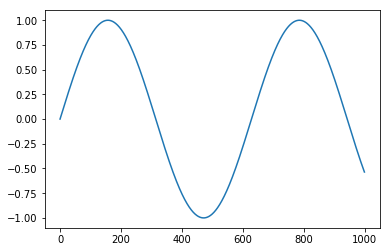

In [16]:
%pylab inline
# from matplotlib import pylab as plt
from math import sin

x = range(1000)
y = [sin(i / 100) for i in x]

plot(x, y)
# plot(x, y, color="green")
# help(plot)

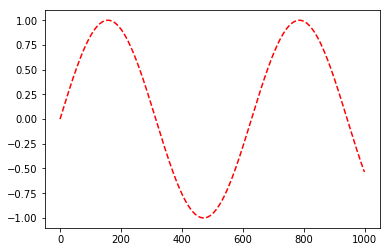

In [17]:
plot(x, y, color="red", linestyle='dashed')
#help(plot)

### 7. Повернення даних з функції за допомогою Return
Функція може повертати що завгодно, в тому числі й іншу функцію

In [18]:
def f1():
    print("f1")
    def f2():
        print("Hello!")
    return f2

print(f1)
print(f1())
print(f1()())

<function f1 at 0x0000020F3E6C1048>
f1
<function f1.<locals>.f2 at 0x0000020F3E64E378>
f1
Hello!
None


### 8. Лямбда функції

In [19]:
def make_incrementor(n):
    return lambda x: x + n

f = make_incrementor(42)
print(f)

print(f(2))

<function make_incrementor.<locals>.<lambda> at 0x0000020F3E64E510>
44


Приклад застосування однієї функції до всіх елементів списку

In [20]:
alaries = [40000, 30000, 25000, 42000]
salaries_indexed = map(lambda sal: sal * 1.13, salaries)
print(salaries_indexed)
[round(sal) for sal in salaries_indexed]

[28250, 33900, 45200, 47460]

Приклад фільтрації списку

In [21]:
salaries = [40000, 30000, 25000, 42000]
filtered_salaries = filter(lambda sal: sal > 30000, 
                           salaries)
print(filtered_salaries)
[sal for sal in filtered_salaries]

[40000, 42000]

### 9. Генератор

In [22]:
def firstn(n):
    num, nums = 0, []
    while num < n:
        nums.append(num)
        num += 1
    return nums

sum_of_first_n = sum(firstn(10))
print(sum_of_first_n)

45


З скороченою нотацією списків ми вже стикалися. Таку конструкцію також називають генератором списку.

In [23]:
doubles = [2 * n for n in range(50)]
print(doubles)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]


Але бувають і вирази-генератори (синтаксис такий же, як для генератора списку, тільки дужки круглі). Це більш ефективно, ніж використання генератора списків.

In [24]:
numbers = (1, 2, 3, 4, 5)
squares_under_10 = (number * number 
                    for number in numbers 
                    if number * number < 10)
print(squares_under_10)
for i in squares_under_10:
    print(i, end=', ')

<generator object <genexpr> at 0x0000020F3E693AF0>
1, 4, 9, 